In [1]:
import h5py
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import glob


/Users/wonderit/opt/anaconda3/envs/ecg/lib/python3.7/site-packages/h5py/__init__.py:73: UserWarning: h5py is running against HDF5 1.10.4 when it was built against 1.8.4, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [12]:
X_train = np.genfromtxt('../../processed_data/Xtrain', delimiter=',', dtype='float')
y_train = np.genfromtxt('../../processed_data/ytrain', delimiter=',', dtype='float')

X_test = np.genfromtxt('../../processed_data/Xtest', delimiter=',', dtype='float')
y_test = np.genfromtxt('../../processed_data/ytest', delimiter=',', dtype='float')

In [13]:
print('Data Loading finished (row:{})'.format(len(X_train)))

Data Loading finished (row:7676)


In [4]:
def scale_maxabs(arr, maxabs, thres):
    arr = (arr / maxabs) * thres
    return arr

In [5]:
def apply_threshold(arr, thres):
    arr[arr > thres] = thres
    arr[arr < -thres] = thres
    return arr

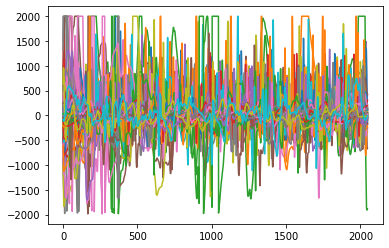

In [19]:
X = apply_threshold(X_train, 2000)
# plot random X
plt.clf()
for i in range(100):
    plt.plot(X[400+i, :])
    
plt.savefig('MLII_no_normalization_thres.png', edgecolor='black', dpi=600)

In [30]:
from biosppy.signals import tools as st
order = int(0.3 * 100)
filtered_train_x, _, _ = st.filter_signal(signal=X_train,
                                          ftype='FIR',
                                          band='bandpass',
                                          order=order,
                                          frequency=[3, 45],
                                          sampling_rate=100)
filtered_test_x, _, _ = st.filter_signal(signal=X_test,
                                          ftype='FIR',
                                          band='bandpass',
                                          order=order,
                                          frequency=[3, 45],
                                          sampling_rate=100)

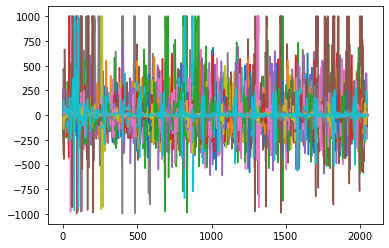

In [25]:
X_threshold = apply_threshold(filtered, 1000)
plt.clf()
for i in range(100):
    plt.plot(X_threshold[500+i, :])

In [ ]:
test_x_thres = apply_threshold(filtered_test_x, 1000)
plt.clf()
for i in range(100):
    plt.plot(test_x_thres[100+i, :])

In [ ]:
current_x = scale_maxabs(X_threshold, np.max(np.abs(X_threshold)), 30)
plt.clf()
for i in range(100):
    plt.plot(current_x[500+i, :])

In [ ]:
current_test_x = scale_maxabs(test_x_thres, np.max(np.abs(test_x_thres)), 30)
plt.clf()
for i in range(100):
    plt.plot(current_test_x[500+i, :])

In [ ]:
import os
data_dir = '../../subsampled_data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
train_file_suffix = 'train'
test_file_suffix = 'test'

file_name_train_x = 'X{}'.format(train_file_suffix)
file_name_train_y = 'y{}'.format(train_file_suffix)
file_name_test_x = 'X{}'.format(test_file_suffix)
file_name_test_y = 'y{}'.format(test_file_suffix)

np.savetxt('{}/{}'.format(data_dir, file_name_train_x), current_x, delimiter=',', fmt='%1.8f')
np.savetxt('{}/{}'.format(data_dir, file_name_train_y), y_train, delimiter=',', fmt='%1.8f')
np.savetxt('{}/{}'.format(data_dir, file_name_test_x), current_test_x, delimiter=',', fmt='%1.8f')
np.savetxt('{}/{}'.format(data_dir, file_name_test_y), y_test, delimiter=',', fmt='%1.8f')


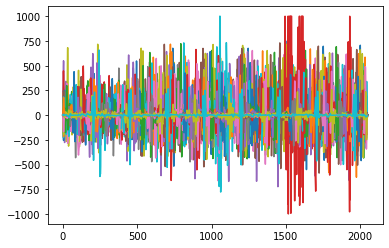

In [32]:
import os
data_dir = '../../subsampled_data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
train_file_suffix = 'train'
test_file_suffix = 'test'

file_name_train_x = 'X{}'.format(train_file_suffix)
file_name_train_y = 'y{}'.format(train_file_suffix)
file_name_test_x = 'X{}'.format(test_file_suffix)
file_name_test_y = 'y{}'.format(test_file_suffix)

np.savetxt('{}/{}'.format(data_dir, file_name_train_x), current_x, delimiter=',', fmt='%1.8f')
np.savetxt('{}/{}'.format(data_dir, file_name_train_y), y_train, delimiter=',', fmt='%1.8f')
np.savetxt('{}/{}'.format(data_dir, file_name_test_x), current_test_x, delimiter=',', fmt='%1.8f')
np.savetxt('{}/{}'.format(data_dir, file_name_test_y), y_test, delimiter=',', fmt='%1.8f')


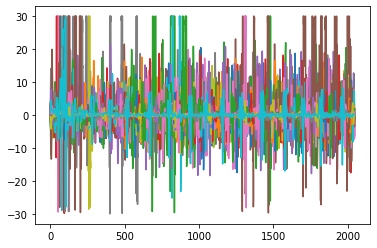

In [27]:
current_x = scale_maxabs(X_threshold, np.max(np.abs(X_threshold)), 30)
plt.clf()
for i in range(100):
    plt.plot(current_x[500+i, :])

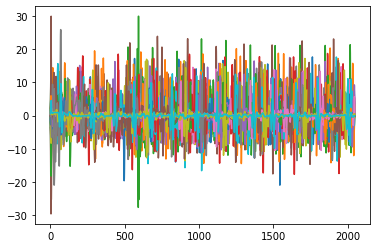

In [33]:
current_test_x = scale_maxabs(test_x_thres, np.max(np.abs(test_x_thres)), 30)
plt.clf()
for i in range(100):
    plt.plot(current_test_x[500+i, :])

In [36]:
import os
data_dir = '../../subsampled_data'

if not os.path.exists(data_dir):
    os.makedirs(data_dir)
train_file_suffix = 'train'
test_file_suffix = 'test'

file_name_train_x = 'X{}'.format(train_file_suffix)
file_name_train_y = 'y{}'.format(train_file_suffix)
file_name_test_x = 'X{}'.format(test_file_suffix)
file_name_test_y = 'y{}'.format(test_file_suffix)

np.savetxt('{}/{}'.format(data_dir, file_name_train_x), current_x, delimiter=',', fmt='%1.8f')
np.savetxt('{}/{}'.format(data_dir, file_name_train_y), y_train, delimiter=',', fmt='%1.8f')
np.savetxt('{}/{}'.format(data_dir, file_name_test_x), current_test_x, delimiter=',', fmt='%1.8f')
np.savetxt('{}/{}'.format(data_dir, file_name_test_y), y_test, delimiter=',', fmt='%1.8f')
